In [4]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [5]:
# Create engine & connection
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [6]:
# Create automap
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Measurement = Base.classes.measurement
Station = Base.classes.station


In [7]:
# Start a session to query the database
session = Session(engine)

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [11]:
# From sorting measurement dataframe on data_engineering notebook the latest data on record is 2017-08-23
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
       group_by(Measurement.date).all()


In [14]:
precipitation

[('2016-08-23', 0.7),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.33),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.05),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.81

In [15]:
#Visualize precipitation as DF in pandas.

precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()

,date,prcp
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-26,0.01
4,2016-08-27,0.00


In [16]:
#Set the index to "date".

year_precip = precipitation_df.set_index("date")
year_precip.head()


,prcp
date,
2016-08-23,0.70
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,0.00


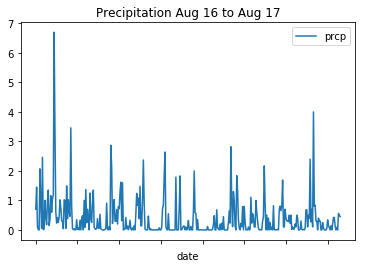

In [19]:
#Plot the results using the "plot" method.
year_precip.plot()

plt.title("Precipitation Aug 16 to Aug 17")
plt.savefig("Precipitation")

plt.show()

In [20]:
# summary statistics for the precipitation data.
year_precip.describe()


,prcp
count,366.000000
mean,0.407295
std,0.691164
min,0.000000
25%,0.000000
50%,0.110000
75%,0.545000
max,6.700000


### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [22]:
# Calculate the total number of stations
stations = session.query(func.count(Station.station))
station_count = stations[0]
station_count

(9)

In [23]:
# Find the most active stations by the highest number of observations
counts = session.query(Measurement.station, func.count(Measurement.prcp))\
             .group_by(Measurement.station)\
             .order_by(func.count(Measurement.prcp).desc())

# Printing observations
for station in counts:
    print(station)
    
# Storing station name
top_station = counts[0][0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [36]:
# Retrieve the last 12 months of temperature observation data (tobs).
tobs = session.query(Measurement.tobs)\
               .filter(Measurement.date>= "2016-08-23")\
               .filter(Measurement.station == top_station)
        
# Converting to a list
tobs_data = []
for row in tobs:
    tobs_data.append(row[0])

In [35]:
tobs_data

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

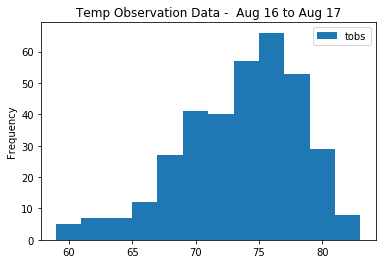

In [38]:
# Plotting histogram
plt.hist(tobs_data, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.title("Temp Observation Data -  Aug 16 to Aug 17")
plt.legend()
plt.savefig("station_analysis.png")
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

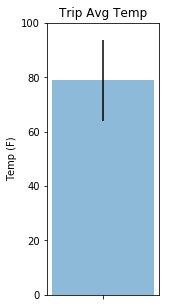

In [60]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date,\
         Measurement.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, width=0.0001, alpha=0.5, tick_label="")
    plt.title("Trip Avg Temp")
    plt.ylim(0,100)
    plt.ylabel("Temp (F)")
      
    
calc_temps("2017-08-03", "2017-08-19")
